### Preliminary Actions

In [1]:
# There are many warnings regarding the updates in the future releases of the libraries. Ignore them.
import warnings
warnings.filterwarnings("ignore")

# Set the backend of matplotlib to inline
%matplotlib inline

# Import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set style and context
sns.set_style('whitegrid')
sns.set_context('talk')

# Read the csv file created in the Data Wrangling section
df=pd.read_csv('wrangled_data.csv')

#Print the first five rows of the data
df.head()

state          county region  RUCC  less_than_high_school  \
0    AL  Autauga County  South     2                 12.417   
1    AL  Baldwin County  South     3                  9.972   
2    AL  Barbour County  South     6                 26.236   
3    AL     Bibb County  South     1                 19.302   
4    AL   Blount County  South     1                 19.969   

   high_school_diploma  college/associate_degree  bachelors/higher  poverty  \
0               34.331                    28.660            24.593     14.0   
1               28.692                    31.788            29.547     12.0   
2               34.927                    25.969            12.868     30.0   
3               41.816                    26.883            12.000     20.0   
4               32.942                    34.039            13.050     14.0   

   unemployment  
0           5.3  
1           5.4  
2           8.6  
3           6.6  
4           5.5

### Step 1: Create the boxplot of all quantitative variables to understand their distribution

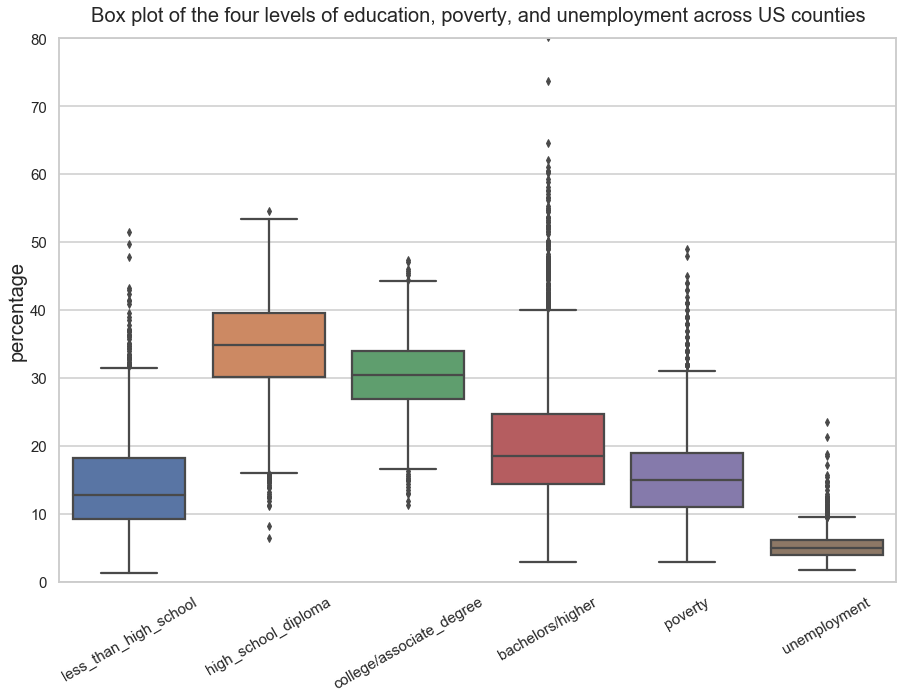

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df.iloc[:,4:])
plt.title('Box plot of the four levels of education, poverty, and unemployment across US counties',fontsize=20, y=1.02)
plt.ylabel('percentage',fontsize = 20)
plt.xticks(rotation=30)
plt.tick_params(axis='both',labelsize = 15)
plt.ylim(0,80)
plt.show()

### Observations 
#### 1) Among the four education levels, 
####   a) The first quartile, median, and third quartile of less_than_high_school are the lowest among the four first quartiles, the four medians, and the four third quartiles, respectively.  The quartiles of high_school_diploma are the highest.  the quartiles of College/associate_degree and bachelors/higher are ranked second and third, respectively. 

####  b) College/associate_degree has the lowest width of inter quartile range. It means it has the most dense distribution. On the other hand, high_school_diploma and bachelors/higher have the widest inter quartile ranges, but bachelors/higher have many more outliers than high_school_diploma, and so it has the least dense distribution

#### 2) Less_than_high_school, bachelors/higher, poverty, and unemployment are skewed right. High_school_diploma is skewed left. College/associate_degree is approximately symmetric.

#### 3) Unemployment has the most dense distribution among all the quantitative variables. The distance between lower and upper whiskers is less than ten percent

### Step 2: Examine the relationship between each level of education on the one hand, and unemployment and poverty on the other hand
</div>

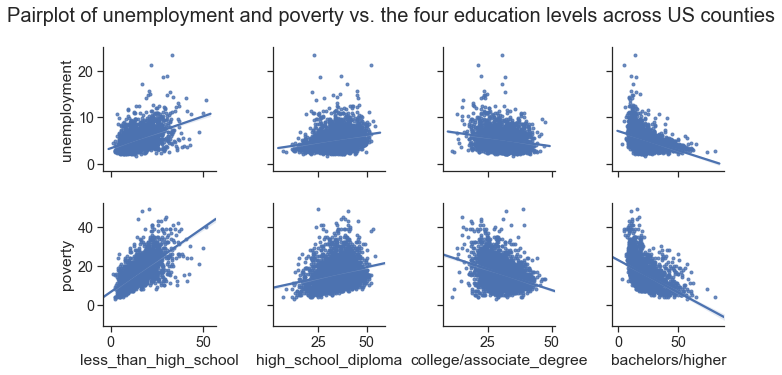

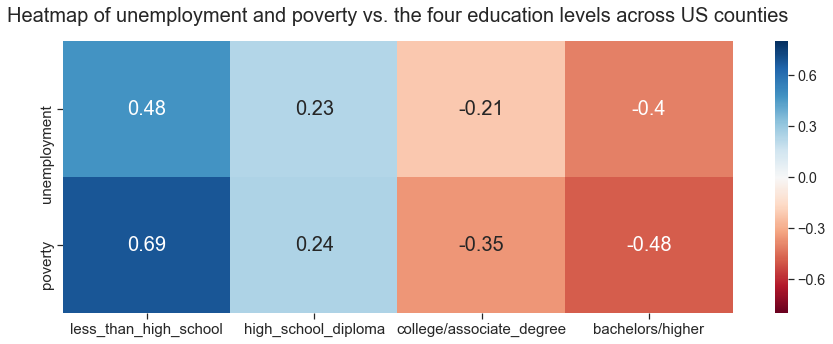

In [31]:
# Change the plot style and font scale to have clearer plots
sns.set(style="ticks", font_scale=1.3)

# Create a dataframe with only six columns: four levels of education, unemployment, and poverty
df_reduced = df.loc[:,['less_than_high_school','high_school_diploma','college/associate_degree'
                       ,'bachelors/higher','unemployment','poverty']]

# pairplot poverty and unemployment vs each level of education  and plot the regression line
g=sns.pairplot(df,x_vars=['less_than_high_school','high_school_diploma','college/associate_degree'
                          ,'bachelors/higher'],y_vars=['unemployment','poverty'],kind="reg",markers='.')
g.fig.suptitle("Pairplot of unemployment and poverty vs. the four education levels across US counties",fontsize=20,y=1.05)

# Create the correlation matrix and separate the target elements
corr_df_reduced = df_reduced.corr().iloc[4:,:4]

# Resize the plot for heatmap
plt.figure(figsize = (15,5))
# Plot the heatmap, annotate it, and resize the annotation
sns.heatmap(corr_df_reduced,annot=True, vmin=-0.8, vmax=0.8, cmap = 'RdBu',annot_kws={"size": 20})
plt.title('Heatmap of unemployment and poverty vs. the four education levels across US counties',fontsize=20, y=1.05)
plt.tick_params(axis='both',labelsize = 15)
plt.show()

### Observation 
#### As the education level goes higher, the slope of regression line as well as the correlation coefficient between the education level and both poverty and unemployment go lower. In other words, higher education results in lower unemployment and poverty.

### Step 3: Examine the correlation between education, unemployment, and poverty all together. In order to simplify the interpretation, a new education variable is introduced to be used instead of the four education levels. The plots above show that poverty and unemployment are positively correlated to less_than_high_school and high_school_diploma, and negatively correlated to college/associate_degree and bachelors/higher. Therefore, an appropriate option as the new education variable is either sum of the first two or the last two education levels. The latter is chosen so that the value of the new variable represents the percentage of county population who are more educated and achieved some degree beyond high school diploma

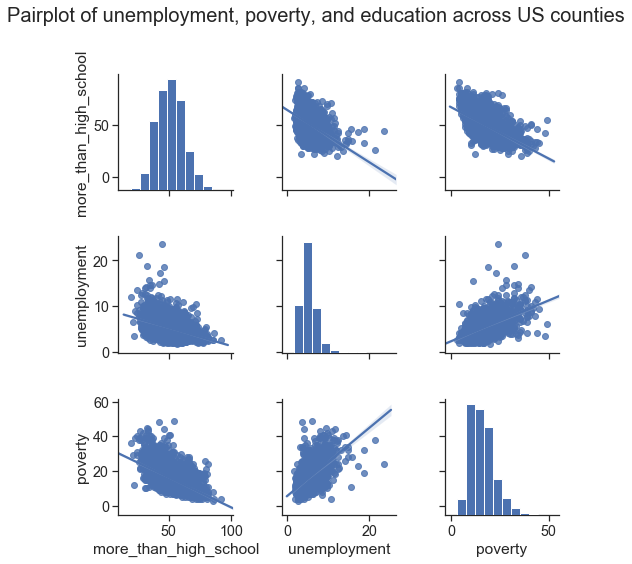

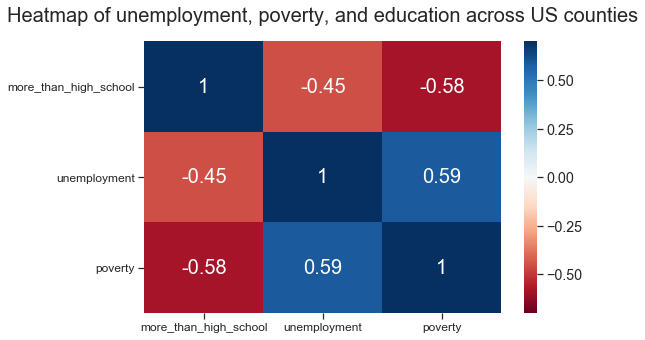

In [32]:
# Define the new column for the new variable
df['more_than_high_school'] = df['college/associate_degree']+df['bachelors/higher']

# Create a dataframe with only three columns: more than high school, unemployment, and poverty
df_reduced = df.loc[:,['more_than_high_school','unemployment','poverty']]

#Create the paiplot between the three variables and add the regression line
g=sns.pairplot(df_reduced,kind="reg")
g.fig.suptitle("Pairplot of unemployment, poverty, and education across US counties",fontsize=20,y=1.05)

# Create the correlation matrix
corr_df_reduced = df_reduced.corr()

#Resize the plot for heatmap
plt.figure(figsize = (8,5))

# Plot the heatmap, annotate it, and resize the annotation
sns.heatmap(corr_df_reduced,annot=True,vmin=-0.7,vmax=0.7,cmap='RdBu',annot_kws={"size": 20})
plt.title('Heatmap of unemployment, poverty, and education across US counties',fontsize=20,y=1.05)
plt.tick_params(axis='both',labelsize=12)
plt.xticks(rotation = 0)
plt.show()

### Observation 
#### Unemployment and poverty have strongly positive correlation with each other. In addition, both have strongly negative correlation with education.

### Step 4: Create the boxplot of the four education levels, unemployment and poverty across the counties in each of the nine rural urban continuum codes (RUCC). For more information on RUCC check below. Two plots are provided to avoid a single busy plot.

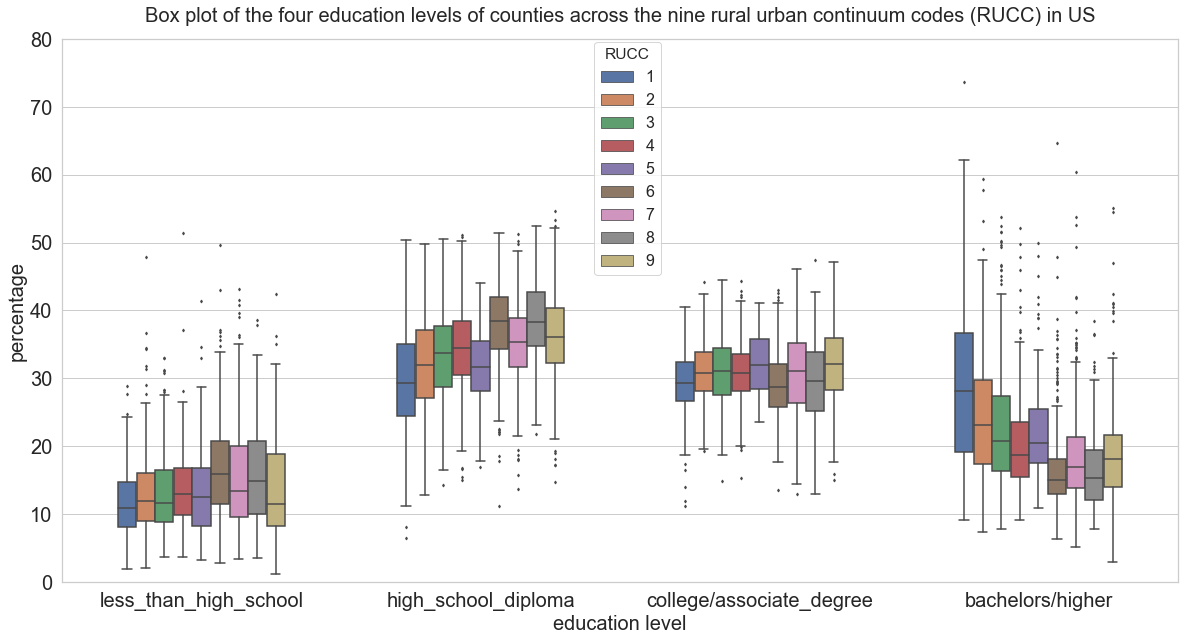

In [33]:
# Set style
sns.set_style('whitegrid')

# Create a copy of the dataframe
df_copy = df.copy()

# Sort the RUCC column
df_copy.sort_values(['RUCC'],inplace=True)

#Melt the dataframe based on the four education levels
df_melt = pd.melt(df_copy,id_vars='RUCC',value_vars=['less_than_high_school','high_school_diploma','college/associate_degree',
                                                     'bachelors/higher'], var_name='education_level',value_name='percentage')

# Create the boxplot of the four education level for each RUCC
figure, ax = plt.subplots(figsize=(20,10))
sns.boxplot(ax=ax, x='education_level',y='percentage',hue='RUCC',data=df_melt,fliersize=2,width=0.6)
ax.legend(loc='lower left',bbox_to_anchor=(0.47,0.55),fontsize=16,title='RUCC')
ax.set_ylim(0,80)
ax.set_title('Box plot of the four education levels of counties across the nine rural urban continuum codes (RUCC) in US',
             fontsize = 20, y=1.02)
ax.set_xlabel('education level',fontsize = 20)
ax.set_ylabel('percentage',fontsize = 20)
ax.tick_params(axis='both', labelsize=20)
plt.show()

### Observations

#### 1) less_than_high_school: RUCC 1 (the blue box) has the lowest quartiles (first quartile, median, and third quartile) compared to the corresponding quartiles of the rest of RUCC. In addition, RUCC 2 to 5 (orange, green, red, and purple boxes) overall have lower mean and especially lower third quartiles compared to the corresponding quartiles in RUCC 6 to 9 (brown, pink, gray, and beige boxes).

#### 2) high_school_diploma: Again,  RUCC 1 (the blue box) has the lowest quartiles compared to the corresponding quartiles in the rest of RUCC. Also, the quartiles in RUCC 2 to 5 (orange, green, red, and purple boxes) on the one hand are lower than the corresponding quartiles in RUCC 6 to 9 (brown, pink, gray, and beige boxes) on the other hand. 

#### 3) college/associate_degree: There is not a significant difference across the nine RUCC. The means are quite close to each other, and except for some, the first as well as third quartiles are close to each other as well.

#### 4) bachelors/higher: The nine RUCC can be divided into three categories similar to less_than_high_school and  high_school_diploma, but the difference is the percentages go lower as RUCC goes higher. RUCC 1 (the blue box) has the highest first quartile and especially mean and third quartile compared to the corresponding quartiles in the rest of RUCC. Also, RUCC 2 to 5 (orange, green, red, and purple boxes) have higher first quartiles, medians, and third quartiles than the corresponding quartiles in RUCC 6 to 9 (brown, pink, gray, and beige boxes) 

#### Therefore, it can be concluded that the overall education level of a county depends on the size of its population; counties with more than 1 million population (RUCC 1) have the highest education while counties with less than 20'000 population (RUCC 6 to 9) have the lowest.

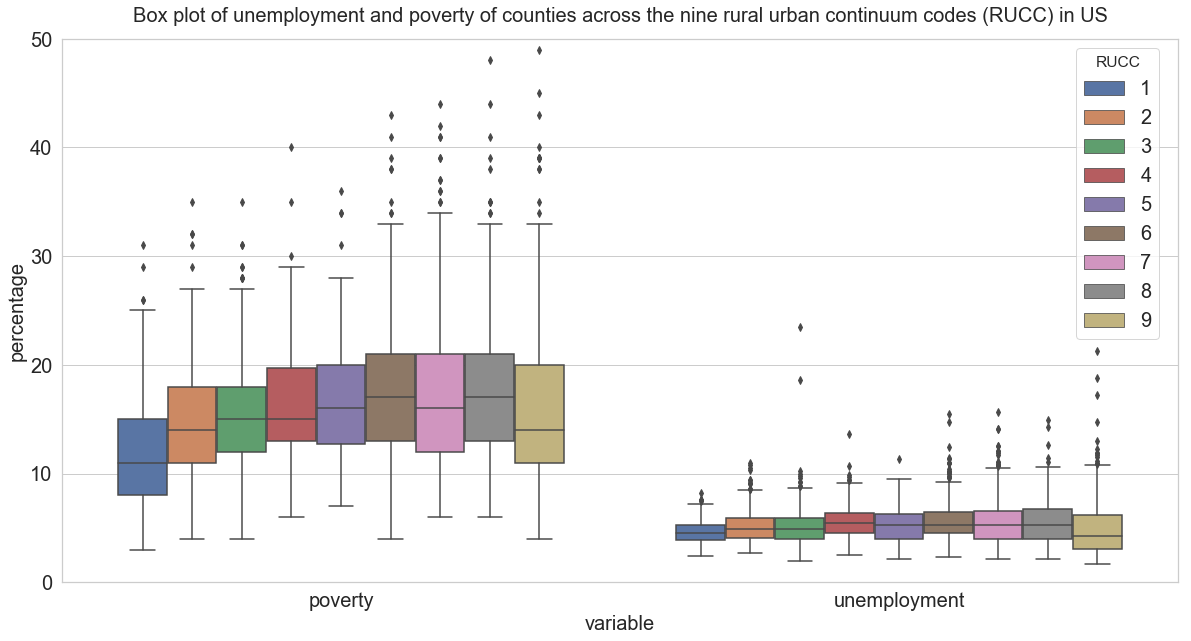

In [34]:
#Melt the dataframe based on unemployment and poverty
df_melt = pd.melt(df_copy,id_vars='RUCC',value_vars=['poverty','unemployment'], var_name='variable',value_name='percentage')

# Create the boxplot of the poverty and unemployment for each RUCC code
figure, ax = plt.subplots(figsize=(20,10))
sns.boxplot(ax=ax, x='variable',y='percentage',hue='RUCC', data=df_melt)
ax.legend(loc='lower left',bbox_to_anchor=(0.9,0.43),fontsize=20,title='RUCC')
ax.set_title('Box plot of unemployment and poverty of counties across the nine rural urban continuum codes (RUCC) in US',
             fontsize = 20, y = 1.02)
ax.set_xlabel('variable',fontsize = 20)
ax.set_ylabel('percentage',fontsize = 20)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylim(0,50)
plt.show()

### Observations

#### 1) The quartiles (first quartile, median, and third quartile) of the poverty in RUCC 1 (the blue box) is significantly lower compared to the corresponding quartiles in the rest of RUCC (from the orange to the beige boxes). In other words, counties in RUCC 1 have the least poverty among all rural urban continuum codes

#### 2) The medians of the poverty in RUCC 2 to RUCC 9 (from the orange to the beige boxes) are quite close to each other. Their first quartiles are close to each other as well, but the third quartiles of poverty in RUCC 2 and 3 (the orange and green boxes) are lower than the corresponding quartiles in RUCC 4 to 9 (from the red to the beige boxes). In other words, RUCC 2 and 3 have slightly lower poverty compared to RUCC 4 to 9.

#### 3) There is not a major difference between the unemployment distribution among the nine RUCC.

### Step 5: Create the heatmap of poverty, unemployment, and education vs. the nine rural urban continuum codes (RUCC). Again, in order to simplify the interpretation, the new education variable, which is the sum of college/associate_degree and bachelors/higher, is used instead of the four education levels. Since RUCC is a categorical variable, nine dummy variables are introduced, one for each RUCC

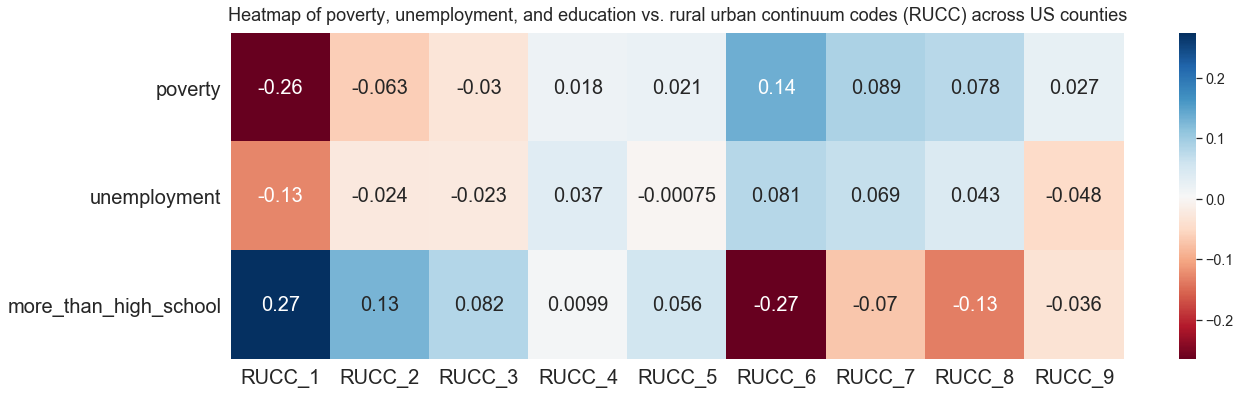

In [35]:
#Create a new dataframe with RUCC, povert, unemployment, and more_than_high_school
df_reduced = df.loc[:,['RUCC','poverty','unemployment','more_than_high_school']]

# Change the datatype of RUCC and create the dummy variables for the nine RUCC 
df_reduced.RUCC = df_reduced.RUCC.astype('str')
df_new = pd.get_dummies(df_reduced)

# Create the correlation matrix, select the necessary elements, and create the heatmap between poverty, unemployment, and
# more_than_high_school on the one hand and the nine RUCC on the other hand.
plt.figure(figsize=(20,6))
corr_df = df_new.corr().iloc[:3,3:]
sns.heatmap(corr_df, annot=True, annot_kws={'size':20}, cmap='RdBu')
plt.title('Heatmap of poverty, unemployment, and education vs. rural urban continuum codes (RUCC) across US counties',
          fontsize=18, y=1.02)
plt.yticks(rotation = 0)
plt.tick_params(labelsize = 20)
plt.show()

### Observation

#### Among all rural urban continuum codes (RUCC), counties in RUCC 1 have the most positive correlation with education and the most negative correlation with both poverty and unemployment. On the other hand, counties in RUCC 6 have the most negative correlation with education and the most positive correlation with both poverty and unemployment.

### Step 6: Create the boxplot of the four education levels as well as unemployment and poverty across the counties in each of the four geographical regions in US; South, West, Northeast, and Midwest¶

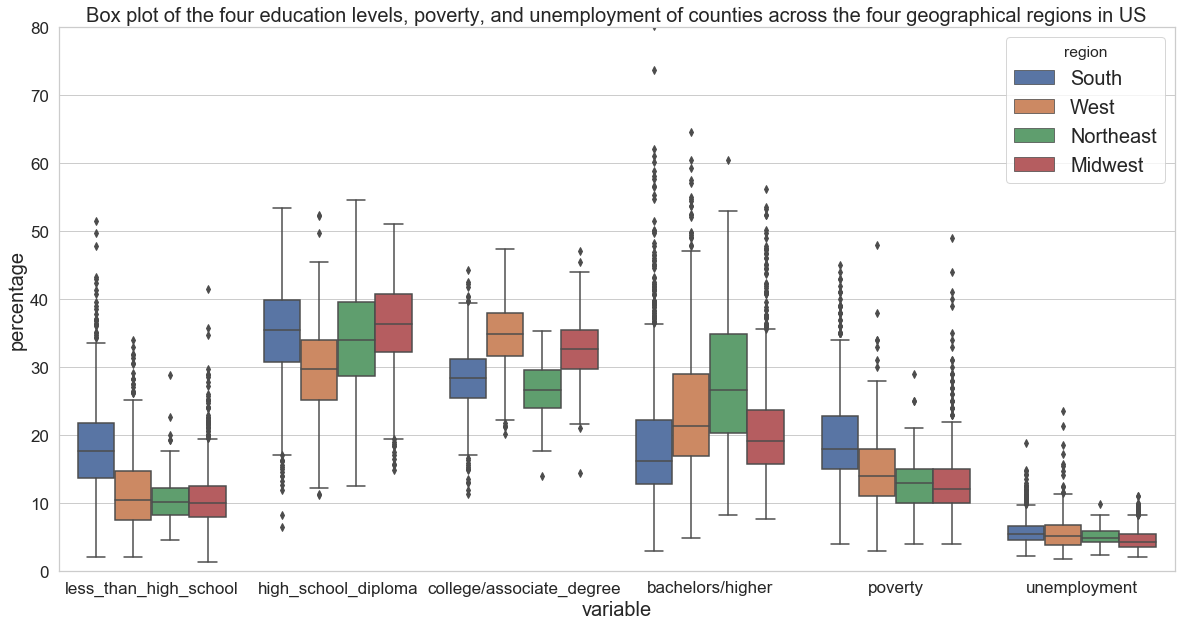

In [36]:
# Melt the dataframe based on all quantitative variables 
df_melt = pd.melt(df,id_vars='region',value_vars=['less_than_high_school','high_school_diploma',
                                                 'college/associate_degree','bachelors/higher','poverty',
                                                 'unemployment'], var_name='variable',value_name='percentage')

# Create the boxplot of all quantitative variables based on the four geographical region
plt.figure(figsize=(20,10))
sns.boxplot(x='variable',y='percentage',hue='region',data=df_melt)
plt.legend(fontsize=20,title='region')
plt.title('Box plot of the four education levels, poverty, and unemployment\
 of counties across the four geographical regions in US',fontsize = 20)
plt.xlabel('variable',fontsize = 20)
plt.ylabel('percentage',fontsize = 20)
plt.ylim(0,80)
plt.tick_params(labelsize=17)
plt.show()

### Observations

#### 1) Education:

#### 1.a) less_than_high_school: the quartiles (median, first, and third quartiles) in South (the blue box) are significantly higher than the corresponding quartiles in the other three geographical regions
#### 1.b) high_school_diploma: the quartiles in West (the orange box) are lower than the corresponding quartiles in the other three geographical regions
#### 1.c) college/associate_degree: the quartiles in West (the orange box) and Midwest (the red box) are higher than the corresponding quartiles in the other two geographical regions (the blue and green boxes)
#### 1.d) bachelors/higher: the quartiles in Northeast (the green box) and in South (the blue box) have respectively the highest and lowest values among the corresponding quartiles of the four geographical regions

#### Therefore, it can be concluded counties in South have the least education among the four geographical regions.

#### 2) Poverty:

#### 2.a) The quartiles (first quartile, median, and third quartile) of the poverty (the blue box) in South are higher than the corresponding quartiles in other regions. 
#### 2.b) The quartiles of the poverty in Northeast (the green box) and Midwest (the red box) are quite similar and slightly lower than the corresponding quartiles in West (the orange box). 

#### In other words, counties in South have the most poverty and counties in Northeast and Midwest have the least poverty among the four geographical regions

#### 3) There is not a major difference between the unemployment distribution of the four geographical regions.

### Step 7: Create the heatmap of poverty, unemployment, and education vs. the four geographical regions. Again, in order to simplify the interpretation, the new education variable, which is the sum of college/associate_degree and bachelors/higher, is used instead of the four education levels. Since region is a categorical variable, four dummy variables are introduced, one for each region

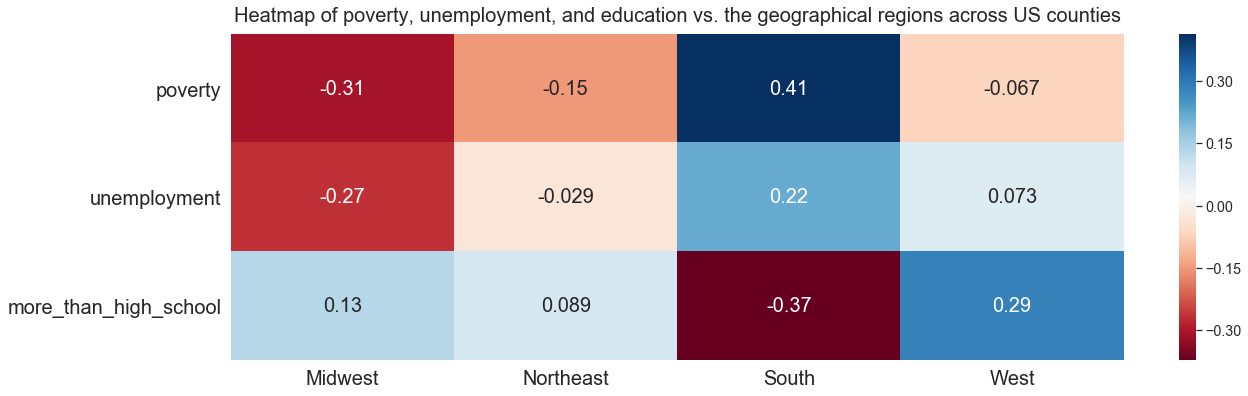

In [37]:
# Create a dataframe with region, poverty, unemployment, and more_than_high_school
df_reduced = df.loc[:,['region','poverty','unemployment','more_than_high_school']]

# Create the dummy variables for the four geographical regions
df_new = pd.get_dummies(df_reduced,prefix = '',prefix_sep = '')

# Create the correlation matrix, select the necessary elements, and create the heatmap between poverty, unemployment, and
# more_than_high_school on the one hand and the four geographical regions on the other hand.
plt.figure(figsize=(20,6))
corr_df_new = df_new.corr().iloc[:3,3:]
sns.heatmap(corr_df_new,annot=True,annot_kws={'size':20},cmap='RdBu')
plt.title('Heatmap of poverty, unemployment, and education vs. the geographical regions across US counties',
          fontsize=20, y=1.02)
plt.yticks(rotation = 0)
plt.tick_params(labelsize = 20)
plt.show()

### Observations
#### 1) Counties in the South have the most negative correlation with education and the most positive correlation with both unemployment and poverty.
#### 2) Counties in Midwest have the most negative correlation with both unemployment and poverty.
#### 3) Counties in West have the most positive correlation with education. Interestingly, they have some positive correlation with unemployment as well.

### Step 8: Creat heatmap between regions and rural urban continuum codes (RUCC)

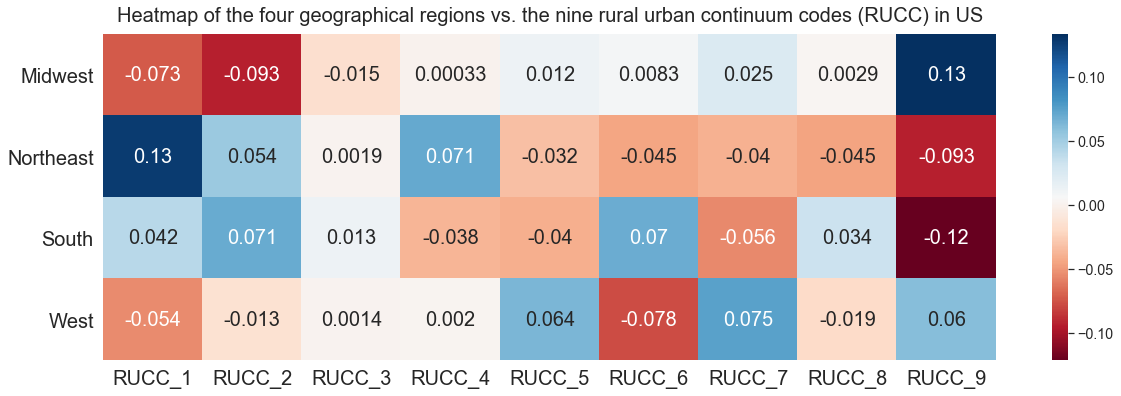

In [38]:
# Create a dataframe with region and RUCC columns
df_reduced = df.loc[:,['region','RUCC']]

# I do not need prefix and prefix_sep for regions but I need them for RUCC. Therefore, I apply pd.get_dummies twice
df_new = pd.get_dummies(df_reduced,prefix='',prefix_sep='')
df_new.RUCC = df_new.RUCC.astype('str')
df_new = pd.get_dummies(df_new)

# Create the correlation matrix and the heatmap
corr_df = df_new.corr().iloc[:4,4:]
plt.figure(figsize=(20,6))
sns.heatmap(corr_df,annot=True,annot_kws={'size':20},cmap='RdBu')
plt.title('Heatmap of the four geographical regions vs. the nine rural urban continuum codes (RUCC) in US',
          fontsize=20, y=1.02)
plt.yticks(rotation = 0)
plt.tick_params(labelsize = 20)
plt.show()


#### Observation
#### No significantly positive or negative correlation exist in the table. The highest positive correlation is 0.13 which is between Northeast and RUCC_1, and between Midwest and RUCC_9. The highest negative correlation is -0.12 which is between South and RUCC_9.

### Step 9: Cross Tabulation: show the table with regions as indices, rural urban continuum codes (RUCC) as columns and the number of counties in each region-RUCC pair as the value. Then show three tables with the median of each of education (more_than_high_school), poverty, and unemployment in each region-RUCC pair as the value. 

In [39]:
# show the number of counties for each region-RUCC pair 
print('Cross tabulation: number of counties in each region-RUCC pair')
df.pivot_table(index='region',columns='RUCC',values='less_than_high_school',aggfunc='count')

Cross tabulation: number of counties in each region-RUCC pair


RUCC         1    2    3   4   5    6    7    8    9
region                                              
Midwest    108   82  112  72  34  204  158   75  210
Northeast   65   40   25  29   2   27   19    6    4
South      218  207  167  82  31  311  166  113  127
West        41   49   51  31  25   51   90   26   83

### Observation
#### 1) Across many rural-urban continuum code (RUCC), South and Midwest respectively have the first and second highest number of counties among the geographical regions. The only exceptions are RUCC 5 and 9 in which Midwest and South respectively have the first and second highest number of counties
#### 2) Across many RUCC, Northeast and West respectively have the first and second lowest number of counties among the geographical regions. The only exception is RUCC 1 for which West and Northeast respectively have the first and second lowest number of counties
#### 3) Across every geographical region, RUCC 5 has the lowest number of counties among the rural urban continuum codes.

In [40]:
print('Cross tabulation: median of more_than_high_school in each region-RUCC pair')
df_copy.pivot_table(index='region',columns='RUCC',values='more_than_high_school',aggfunc='median')

Cross tabulation: median of more_than_high_school in each region-RUCC pair


RUCC             1       2        3        4        5        6        7  \
region                                                                    
Midwest    57.8515  57.602  56.3315  51.9555  57.5690  47.7705  53.6925   
Northeast  62.6010  55.185  53.0770  52.1050  57.3725  46.9150  49.4940   
South      56.8650  52.343  49.6000  48.0315  48.5180  41.4250  41.5010   
West       68.7310  64.500  60.8750  56.6870  57.5840  53.1730  56.4225   

RUCC             8        9  
region                       
Midwest    50.1800  54.5010  
Northeast  52.2165  39.8795  
South      39.7870  41.9110  
West       59.0580  55.9720

### Observation
#### 1) Across every rural-urban continuum code except RUCC 9, counties in West and South respectively have the highest and lowest education level among the geographical regions. The only difference in RUCC 9 is counties in Northeast have the lowest education level.
#### 2) Across every geographical region, counties in RUCC 1 have the highest level of education among the rural-urban continuum codes (RUCC).

In [41]:
print('Cross tabulation: median of poverty in each region-RUCC pair')
df_copy.pivot_table(index='region',columns='RUCC',values='poverty',aggfunc='median')

Cross tabulation: median of poverty in each region-RUCC pair


RUCC          1     2     3     4     5     6     7     8     9
region                                                         
Midwest    10.5  11.0  12.0  13.0  14.0  13.0  13.0  13.0  12.0
Northeast  10.0  11.5  12.0  14.0  12.0  14.0  14.0  11.5  15.0
South      12.0  16.0  17.0  18.5  20.0  20.0  21.0  20.0  21.0
West        9.0  13.0  15.0  16.0  15.0  16.0  14.0  14.0  14.0

### Observation
#### 1) Across every rural-urban continuum code (RUCC), counties in South have the highest poverty among the geographical regions.
#### 2) Across many RUCC, West have the second highest level of poverty among the geographical regions. The only exceptions are RUCC 1 and 9 for which counties in Midwest and Northeast respectively have the second highest poverty. 
#### 3) Across many RUCC, the difference between the median of poverty in counties of Midwest and Northeast is within 1%. The only exceptions are RUCC 5, 8 and 9 for which the difference is 2%, 1.5% and 3%, respectively.
#### 4) Across every geographical region, counties in RUCC 1 have the lowest poverty among the rural-urban continuum codes.

In [42]:
print('Cross tabulation: median of unemployment in each region-RUCC pair')
df_copy.pivot_table(index='region',columns='RUCC',values='unemployment',aggfunc='median')

Cross tabulation: median of unemployment in each region-RUCC pair


RUCC         1    2    3     4     5    6     7    8    9
region                                                   
Midwest    4.4  4.3  4.1  4.85  4.25  4.6  4.55  4.3  3.5
Northeast  4.7  4.9  4.6  5.70  3.85  5.4  5.00  5.9  6.9
South      4.6  5.0  5.3  5.70  5.90  5.7  6.00  5.8  5.6
West       4.3  5.2  5.7  6.00  5.10  5.7  5.05  5.4  4.6

### Observation
#### Across many rural-urban continuum codes (RUCC), counties in Midwest have the lowest unemployment among the geographical regions. The only exceptions are RUCC 1, 5 and 8 for which counties in West, Northeast and Northeast respectively have the lowest unemployment.